# FINAL PROJECT REPORT - DSCI 100

## Predicting number of played hours on a MineCraft server based on player experience level, gender, and age. 

##### Niloo Nasiri Faskhodi, Yuxuan Zhang, Thavishi Pratap, Govind Venkat Narayanan

## Introduction:
Video games generate a lot of information about how players behave. The UBC Computer Science research group led by Frank Wood is running a special Minecraft research server to study these behaviours. Every time a player joins the server, their actions and play sessions are recorded. In this project, we wants to use this data to understand players better and also to improve how they can run the server in a more efficient way.

Understanding which players tend to generate the most gameplay data is especially important, as they can bring us more information so we can figure out way to improve. The research has shown that playtime across different groups. International studies have reported differences in the played hours across genders. Some finding that men tend to spend more time gaming than women on average (Rehbein et al., 2016). Other work shows that gaming participation is also different across age groups: roughly half of both men and women report playing some form of video game. Young adults are the most active players, while many adults aged 50–64 and even 65+ also play regularly (Bunz et al., 2020). These researches indicates that age and gender may meaningfully decide on gaming behaviour.

In our project, we research about whether similar patterns appear in the Minecraft research server data. Specifically, we aim to identify which “kinds” of players are most likely to contribute a large amount of gameplay data so that efforts can be spent on those groups more effectively. Players who play longer produce richer behavioural data, which is valuable for future research.

Our project focuses on the general question:

**Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.**

This question is very meaningful because players who play longer create more data, which is helpful for the research group. If we can predict which players will have longer playtime, the team can focus their efforts on those types of players and generate more useful data.

The specific question that we're hoping to answer is as follows:

**Can age, gender, and experience level predict the total number of hours a player plays on the MineCraft server using the players dataset?**

To answer this question, we used the dataset: players.csv.

The players dataset contains 196 unique players. Each row represents one player and includes their basic information and their overall gameplay history. The dataset has 7 variables: 

* experience (categorical): How familiar the player is with Minecraft (“Beginner”, “Intermediate”, “Expert”, "Pro", "Regular").

* subscribe (TRUE/FALSE): Whether the player signed up for the game-related newsletter.

* hashedEmail (string): An ID for each player.

* played_hours (numeric): The total number of hours the player has spent on the server across all sessions.

* name (string): Players' usernames.

* gender (categorical): Player’s gender.

* Age (numeric, mostly complete): Player’s age in years.(2 missing values)

In this report, we will show how we tidied and wrangled the data, built and choose our model, and analyzed the results to understand what types of players tend to play more on the server.

## Methods
#### 1. Tidying and wrangling the data

First, we imported all necessary libraries necessary for data analysis, and read our data from a URL that was linked to our GitHub repository.


Then, we tidied the data so we could use it for our data analysis when building prediction models for the data. We ensured that our final data table satisfied the requirements of tidy data: each row is a single observation, each column is a single variable, and each value is a single cell. We also ensured that the final data set only included the variables we wanted to look at when we wanted to build our model. This included removing variables/columns such as `hashedEmail`, `name`, and `subscribe`.

Afterwards, we made visualizations showcasing the relationship between each of our independent variables (`Age`, `gender`, and `experience`) with our dependent variable (`played_hours`) to better understand whether there even was a detectable relationship between the variables we would be creating a regression model with.

#### 2. Building regression models for the data

After gaining a better understanding of the relationships between our variables and tidying our data, we were ready to create a prediction model. Since we're planning to predict a numerical value, we chose to build a regression model rather than a classification model. Prior to starting our data analysis here, we were unsure as to which model would be better: KNN or linear regression.

To determine which model was better, we have to consider the relationship between some of the variables. Since we have three predictor variables, our pattern will most likely not be the most linear, so using a KNN regression may be better because it can fit more complex patterns. Moreover, this flexibility in KNN regression may be helpful because our multivariable regression will most likely be non-linear. Based on this logic, using a KNN regression instead of a linear regression may be advantageous as it can result in a smaller RMSPE (root mean square prediction error) value. A smaller RMSPE value would indicate that the model made fewer errors in the sense that the model's predictions were closer in distance to the real values.

First, we set a seed to ensure that our data is reproducible and that R splits the data the same way randomly every time our code is run. Then, we decided to split our tidy data into a training and testing set. We would first train and tune our models with our training set and then apply the model on the testing set to evaluate its performance.

## Data Analysis

First, we import all necessary libraries for our data analysis.

In [38]:
#loading the library
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(ggplot2)
library(RColorBrewer)
#import glue library to connect variables with characters in a print statement
library(glue)

Now, we load our data using a URL from our GitHub repository, so it's accessible for anyone to load. We use `read_csv` to read the non-wrangled data.

In [39]:
players_data <- read_csv("https://raw.githubusercontent.com/thaviship/dsci-group-project/refs/heads/main/players.csv")
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


*figure 1*

To tidy our data, we will only select our necessary variables to answer our question: `experience`, `gender`, `Age`, and `played_hours`. We decided to remove players who had 0 hours of gameplay as they would not contribute to the data whatsoever. All NA values associated with `Age` were also removed to ensure that all data points we have could be used for our model building later. We also created a standardized scale with the `played_hours` using logarithms.

In [40]:
#tidy data
players_tidy <- players_data |> 

# Select out the hashedEmail and name column vectors as they are identifiers and contain no predictive information.
                select(-hashedEmail, -name, -subscribe) |> 

#Convert subscribe, experience, and gender character variables to factor variables so that R can treat them as categorical variables.
  #mutate(subscribe_fct=as_factor(subscribe)) |> 
  mutate(experience_fct=as_factor(experience)) |>
  mutate(gender_fct=as_factor(gender)) |>

#Filter out the played_hours variable and select only those who have >0 gameplay hours. Zero-hour players are non-contributors and do not contribute to the goal of identifying high-engagement users.
                filter(played_hours>0) |> 

#Remove rows with missing Age, as leaving NA values leads to loss of rows silently and inconsistencies in model prediction.
         filter(!is.na(Age)) |>   

#To deal with extreme outliers in played_hours, transform highly skewed values into log as it compresses the large values, which makes the distribution closer to normal and stabilizes variance. 
         mutate(played_hours_log = log(played_hours + 1))
               

#remove non fct columns to prevent multicollinearlity when performing multivariable linear regression and to ease visualisation of the dataset.

players_clean<- players_tidy |> drop_na(played_hours_log, experience_fct, gender_fct, Age) |> select(experience_fct, gender_fct, Age, played_hours_log)

head(players_clean)

experience_fct,gender_fct,Age,played_hours_log
<fct>,<fct>,<dbl>,<dbl>
Pro,Male,9,3.44361810
Veteran,Male,17,1.56861592
Amateur,Female,21,0.53062825
Regular,Male,21,0.09531018
Amateur,Male,47,0.09531018
Veteran,Female,23,0.95551145


*figure 2*

Below, the total number of hours played is graphed against the experience level of the players. The sum of hours played of each experience category was taken to produce the graph.

experience_fct,total_hours
<fct>,<dbl>
Pro,7.590369
Veteran,13.301916
Amateur,36.530174
Regular,27.261411
Beginner,14.002397


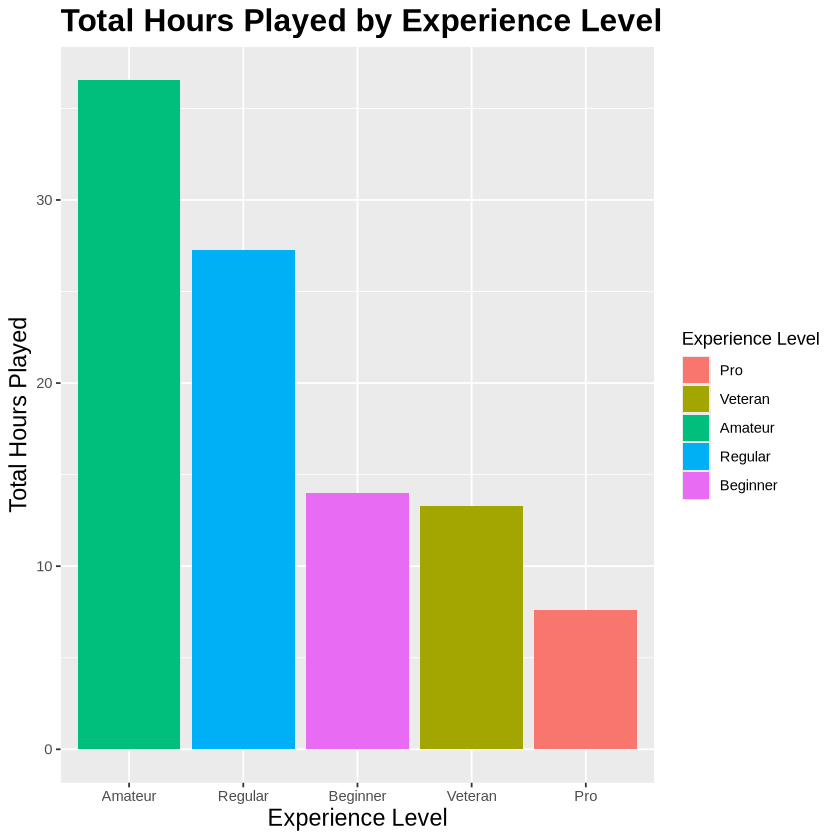

In [56]:
bar_plot_tidy_players <- players_clean |>
  group_by(experience_fct) |>
  summarise(total_hours = sum(played_hours_log), .groups = "drop")
bar_plot_tidy_players

bar_plot_experience_vs_totalhrs <- bar_plot_tidy_players |> 
  ggplot(aes(x = fct_reorder(experience_fct, total_hours, .desc=TRUE),
             y = total_hours,
             fill = experience_fct)) +
  geom_bar(stat = "identity") +
  labs(x = "Experience Level", 
       y = "Total Hours Played", 
       fill = "Experience Level",title = "Total Hours Played by Experience Level")+
    theme(plot.title = element_text(size = 19, face = "bold"),
        axis.title = element_text(size = 14))

bar_plot_experience_vs_totalhrs

*figure 3*

Next, we wanted to see the relationship between the age of players alongside their experience level and the quantity of these groups of people.

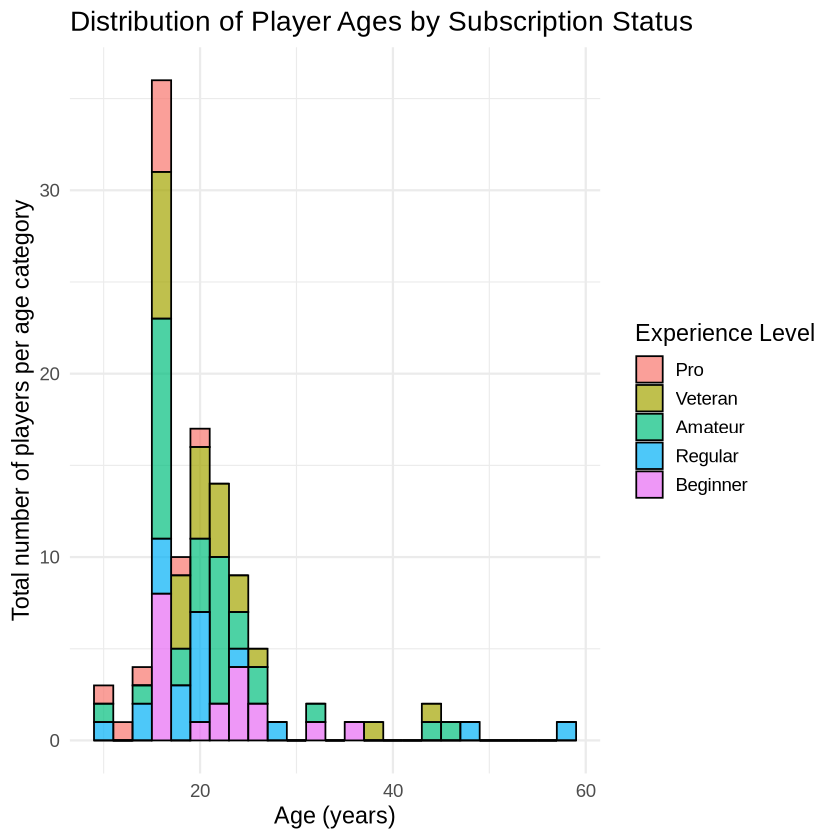

In [58]:
players_age_hours_hist <- players_clean |> 
   ggplot(aes(x = Age, fill = experience_fct)) +
  geom_histogram(binwidth = 2,color="black", alpha=0.7) +
  labs(
    title = "Distribution of Player Ages by Subscription Status",
    x = "Age (years)",
    y = "Total number of players per age category",
    fill = "Experience Level"
  ) +
  theme_minimal(base_size = 14) 
  
players_age_hours_hist

*figure 4*

Below, the sum of played hours based on gender was calculated, which was followed by finding the distribution of played hours depending on the gender.

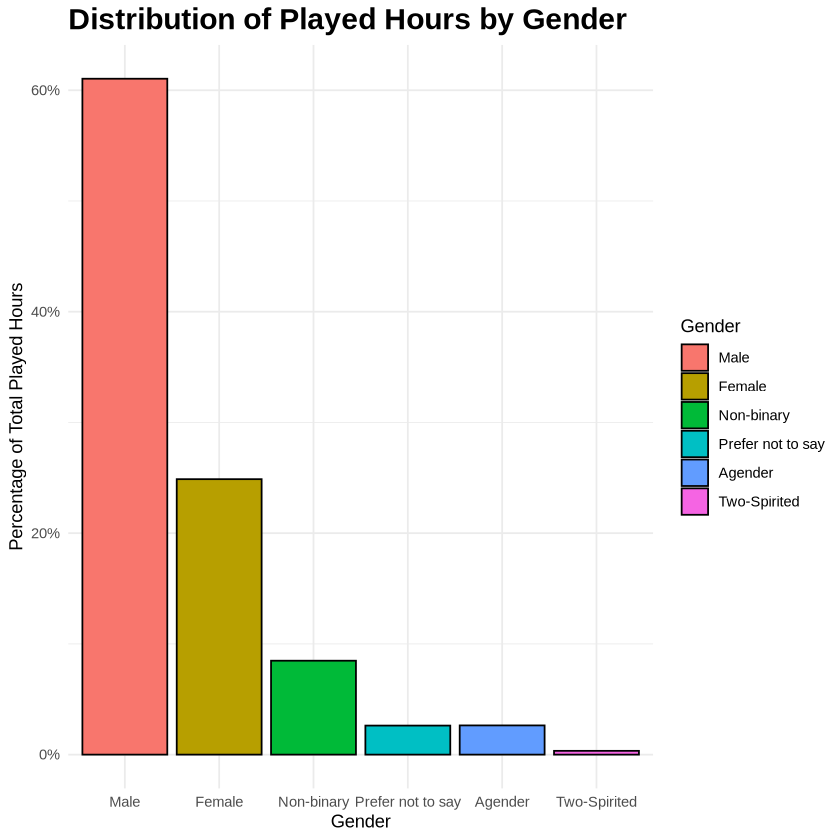

In [55]:
 plot_data <- players_clean |>
  group_by(gender_fct) |> 
  summarise(total_hours = sum(played_hours_log), .groups = "drop") |>
  mutate(percentage = total_hours / sum(total_hours))

experience_gender_percent_plot_fct <- ggplot(plot_data,
                                             aes(x = gender_fct,
                                                 y = percentage, fill=gender_fct)) +
  geom_bar(stat = "identity", colour = "black") +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(
    x = "Gender",
    y = "Percentage of Total Played Hours",
    title = "Distribution of Played Hours by Gender",
  fill="Gender") +
  theme_minimal()+
  theme(plot.title = element_text(size = 18, face = "bold"))
experience_gender_percent_plot_fct


*figure 5*

### Making a prediction model

#### Predicting played hours based on experience level, age, and gender

In [44]:
options(repr.matrix.max.rows = 6)
players_clean

experience_fct,gender_fct,Age,played_hours_log
<fct>,<fct>,<dbl>,<dbl>
Pro,Male,9,3.4436181
Veteran,Male,17,1.5686159
Amateur,Female,21,0.5306283
⋮,⋮,⋮,⋮
Veteran,Female,44,0.09531018
Veteran,Male,22,0.26236426
Amateur,Male,17,1.19392247


*figure 6*

### Applying a KNN regression model

First, we set a seed and split our data. We chose to split/shuffle our data in a way such that 75% of it would be randomly set to be our training set, whereas the remaining 25% would be placed into our testing set. After training our classifier with our training set, we will apply it on the testing set to see if it is effective in making correct predictions.

In [45]:
#setting the seed
set.seed(1234)

#splitting the data into a training and testing set; a 75% proportion ratio will be used for the training data
players_split <- initial_split(players_clean, prop = 0.75, strata = played_hours_log)
players_training <- training(players_split)
players_testing <- testing(players_split)

Now, we start working on creating the model. The first step is to add a recipe, where we specify the response variable, `played_hours_log`, and the predictor variables: `experience_fct`, `Age`, and `gender_fct`. Since we have factor (categorical) variables, we use `step_dummy()` to turn these variables into **dummy** numerical variables, since our model can't really understand non-numerical variables. `step_zv` is used  to check every predictor and removes columns that only have one observation and 0 variance. `step_scale()` and `step_center` is used to scale and standardized so now it has a mean of 0 and a standard deviation of 1.

Next, we create a specification where we train the classifier and specify that it's a KNN regression. We used the `tune()` function in neighbours so we can perform cross-validation using `vfold_cv()`. Having more folds gives us better estimates with less variance. Finally, we can prepare a workflow where we bring everything together and train the classifier.

In [46]:
set.seed(1234)
#make a recipe for preprocessing the data; scale and center the data
players_recipe <- recipe(played_hours_log ~ experience_fct + Age + gender_fct, data = players_training) |>
    step_dummy(all_nominal_predictors()) |>
    step_zv(all_predictors()) |>
    step_scale(all_numeric_predictors()) |>
    step_center(all_numeric_predictors())

#make a knn model, where the best k value is found
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

#conduct cross validation where there are 10 folds
players_vfold <- vfold_cv(players_training, v = 10, strata = played_hours_log)

#create a workflow
players_wkflw <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)
players_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_dummy()
• step_zv()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Next we try an array of different possible k values between 1 and 50 and add it to our classifier. To determine the K value with the lowest RMSE value, we will filter the metrics we have and pull the k value with the lowest RMSE.

In [47]:
set.seed(1234)
#run cross validation and determine the best k value for the training data set
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))
players_results <- players_wkflw |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")
k_min <- players_results |>
    filter(mean == min(mean)) |>
    pull(neighbors)
k_min
#k value with lowest rmspe value is k = 19

[1] 19

To further see the relationship between the k values and their associated RMSE value, a line graph was made. Based on the graph, lower k values than that of the determined `k_min` seemed to have a higher RMSE, which could be indicative that the model would be influenced by every data point, making it overfit the data. However, if we look at the RMSE values past the `k_min` value, we see that there are not that many drastic changes and it seems to possibly plateau. This could be indicative that those k-values can also perform well to a certain degree. This could make sense because we have used 3 predictor variables, which could make the KNN more stable because our points might be relatively stable and not too far from each other.

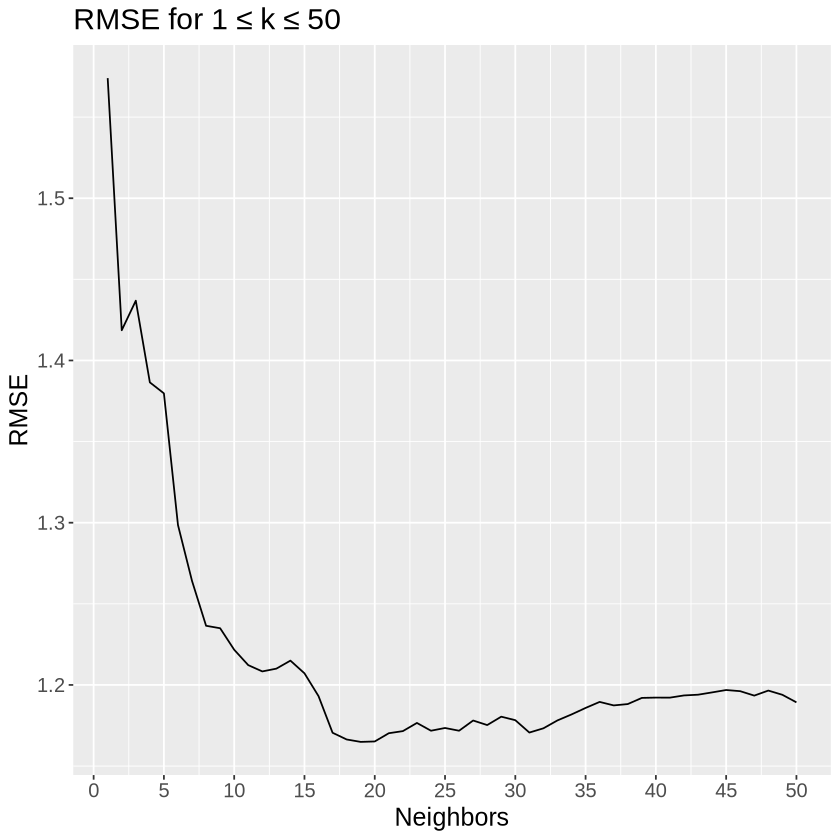

In [48]:
set.seed(1234)
rmse_versus_k <- ggplot(players_results, aes(x = neighbors, y = mean)) +
    geom_line() +
    labs(x = "Neighbors", y = "RMSE", title = "RMSE for 1 ≤ k ≤ 50") +
    scale_x_continuous(breaks = seq(from = 0, to = 50, by = 5)) +
    theme(text = element_text(size = 15))
rmse_versus_k

*figure 7*

Finally, we will apply the trained classifier with its optimal k value and assess how the model does with unseen data (testing data). The metrics were collected, and the RMSPE value was determined.

In [60]:
set.seed(1234)
#apply this k value to the testing set
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")
players_spec

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

players_predictions <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

players_summary <- players_predictions|>
    metrics(truth = played_hours_log, estimate = .pred) |>
    filter(.metric == "rmse")
players_summary

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = k_min
  weight_func = rectangular

Computational engine: kknn 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.190563


*figure 8*

In [61]:
print(glue("The RMSPE value using a KNN regression model is {players_summary |> pull(.estimate)}"))

The RMSPE value using a KNN regression model is 1.19056298253597


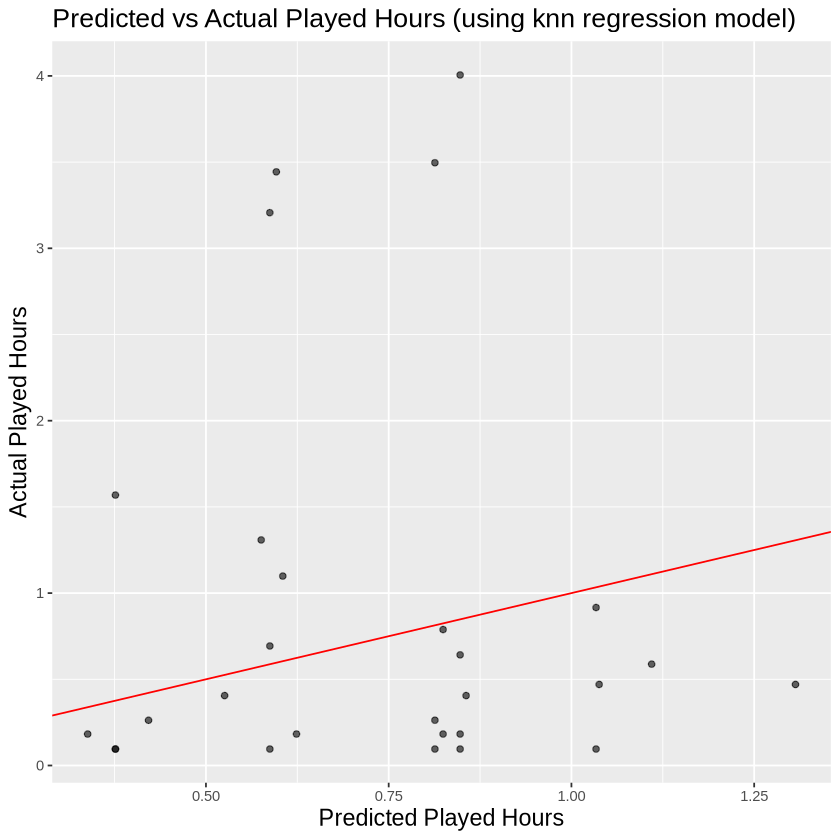

In [50]:
knn_visualization <- ggplot(players_predictions, aes(x = .pred, y = played_hours_log)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Predicted vs Actual Played Hours",
       x = "Predicted Played Hours",
       y = "Actual Played Hours")+
    theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 14))+
        ggtitle("Predicted vs Actual Played Hours (using knn regression model)")
knn_visualization 

*figure 9*

# Conclusion

KNN regression model fits the data better.

# Bibliography:

Rehbein, F., Staudt, A., Hanslmaier, M., & Kliem, S. (2016). Video game playing in the general adult population of Germany: Can higher gaming time of males be explained by gender specific genre preferences? Computers in Human Behavior, 55, 729–735. https://doi.org/10.1016/j.chb.2015.10.016 

Bunz, U., Cortese, J., & Sellers, N. (2020). Examining younger and older adults’ digital gaming habits and health measures. Gerontechnology, 19(4), 1–10. https://doi.org/10.4017/gt.2020.19.04.381
